# [T3] MNIST classification with softmax logistic regression

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from load_dataset import load_MNIST
config_tf = tf.ConfigProto()
config_tf.gpu_options.allow_growth=True

In [2]:
train,test,val=load_MNIST(one_hot_encoding=True,num_classes=10,load_validation=True,num_validation=5000)

In [3]:
train_x, train_y=train
test_x, test_y=test
val_x, val_y=val

In [4]:
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))
print(len(val_x))
print(len(val_y))

55000
55000
10000
10000
5000
5000


In [7]:
feature_size=train_x.shape[1] * train_x.shape[2]
pixel=int(np.sqrt(feature_size))

c:\python\anaconda\envs\tensorflow\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


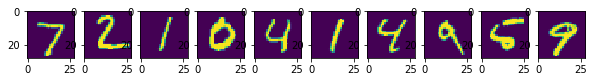

In [12]:
f,a=plt.subplots(1,10,figsize=(10,1))
for i in range(10):
    a[i].imshow(np.reshape(test_x[i],(pixel,pixel)))
f.show()

In [15]:
tf.reset_default_graph()
n_class=10
from layer import LogisticRegression

x=tf.placeholder(dtype='float32',shape=[None,feature_size],name='input_x')
y=tf.placeholder(dtype='float32',shape=[None,n_class],name='input_y')
weight_init=tf.truncated_normal_initializer(stddev=0.5)
bias_init=tf.truncated_normal_initializer(stddev=0.5)

logits=LogisticRegression('LR',x,n_class,weight_init,bias_init,output_type='logits')
# W=tf.get_variable(name='W',shape=[feature_size,n_class],dtype='float32',initializer=weight_init)
# b=tf.get_variable(name='b',shape=[n_class],dtype='float32',initializer=bias_init)

# logits=tf.add(tf.matmul(x,W),b)
# y_pred=tf.nn.softmax(logits)
cost=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits)
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
accuracy=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y,1),tf.argmax(logits,1)),dtype=tf.float32))

In [12]:
print(tf.trainable_variables())

[<tf.Variable 'weight_1:0' shape=(784, 10) dtype=float32_ref>, <tf.Variable 'bias_1:0' shape=(10,) dtype=float32_ref>]


91.42000079154968%


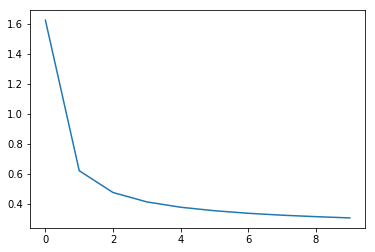

In [14]:
sess=tf.Session(config=config_tf)
init=tf.global_variables_initializer()
sess.run(init)
training_epochs=10
batch_size=200
avg_cost_list=[]
total_batch=int(mnist.train.num_examples/batch_size)
for epoch in range(training_epochs):
    # accuracy_list=[]
    avg_cost=0.
    
    for step in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_xs,y:batch_ys})
        avg_cost+=sess.run(cost,feed_dict={x:batch_xs,y:batch_ys})/total_batch
    avg_cost_list.append(avg_cost)
plt.plot(range(training_epochs),avg_cost_list)
# show training accuracy as iteraction in one epoch
#         accuracy_list.append(sess.run(accuracy_train,feed_dict={x:batch_xs,y_:batch_ys}))
# itr=range(total_batch)
# acc=accuracy_list
# plt.plot(itr,acc)
# plt.xlabel('iteraction')
# plt.ylabel('training accuracy')
# plt.show()
# correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
# accuracy=tf.reduce_mean(tf.cast(correct_prediction,dtype='float32'))
ac=sess.run(accuracy,feed_dict={x:mnist.test.images, y:mnist.test.labels})
print(str(ac*100)+'%')
sess.close()